In [1]:
%cd ..

/Users/goloshch/QUBO_Solver


In [2]:
import torch
from src.planters import wishart

import matplotlib.pyplot as plt

In [3]:
n = 100
m = 50
batch_size = 100

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
s = wishart.generate_solutions(n, batch_size, device=device)
%time J = wishart.generate_problems(s, m, device=device)

CPU times: user 138 ms, sys: 20.9 ms, total: 159 ms
Wall time: 4.37 s


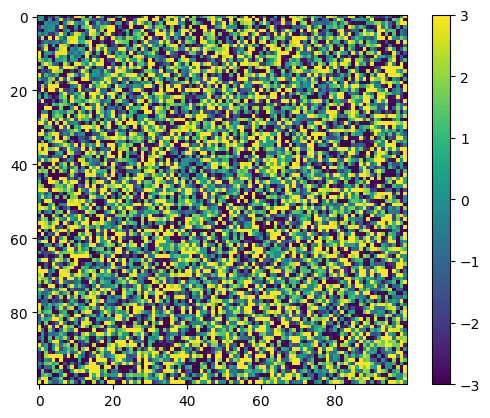

In [4]:
plt.imshow(J[0].to('cpu'), vmin=-3, vmax=3)
plt.colorbar()

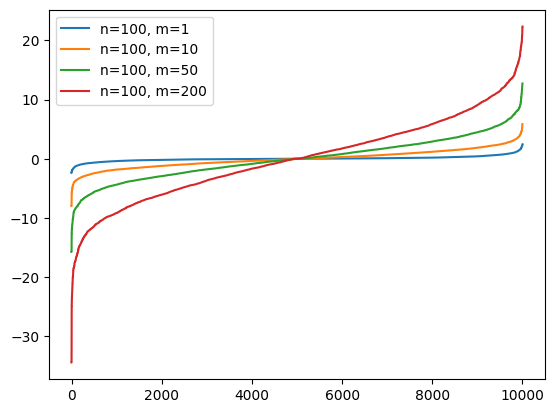

In [5]:
s = wishart.generate_solutions(100, 1, device=device)
ms = [1, 10, 50, 200]
Js = [wishart.generate_problems(s, m, device=device)[0].cpu() for m in ms]

for i in range(1, 5):
    plt.plot(Js[i-1].flatten().sort()[0], label='n=100, m={}'.format(ms[i-1]))

plt.legend()